# Setup

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

Load libraries and set parameters

In [1]:
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None

Load raw data

In [2]:
raw_data = {
    "A": {
        "test_est": pd.read_parquet(os.path.join("data", "A", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "A", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "A", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "A", "train_targets.parquet")),
    },
    "B": {
        "test_est": pd.read_parquet(os.path.join("data", "B", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "B", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "B", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "B", "train_targets.parquet")),
    },
    "C": {
        "test_est": pd.read_parquet(os.path.join("data", "C", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join("data", "C", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join("data", "C", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join("data", "C", "train_targets.parquet")),
    },
}

View data

In [3]:
raw_data["C"]["test_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


In [4]:
raw_data["C"]["train_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


In [5]:
raw_data["C"]["train_obs"]

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


In [6]:
raw_data["C"]["train_tar"]

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


Preproccess data

In [7]:
# Create empty list of location train data and location test data
location_train_data = []
location_test_data = []

# Copy raw data dictonary and loop through it
raw_data_copy = copy.deepcopy(raw_data)
for k in raw_data_copy:

    # Add a column with the difference between date_forecast and date_calc in seconds and remove date_calc
    raw_data_copy[k]["train_obs"]["forecast_seconds"] = 0
    raw_data_copy[k]["train_est"]["forecast_seconds"] = (raw_data_copy[k]["train_est"]["date_forecast"] - raw_data_copy[k]["train_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data_copy[k]["train_est"]["date_calc"]
    raw_data_copy[k]["test_est"]["forecast_seconds"] = (raw_data_copy[k]["test_est"]["date_forecast"] - raw_data_copy[k]["test_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data_copy[k]["test_est"]["date_calc"]

    # Add a column with location
    raw_data_copy[k]["train_obs"]["location"] = k
    raw_data_copy[k]["train_est"]["location"] = k
    raw_data_copy[k]["test_est"]["location"] = k

    # Concat and merge train observed, train estimated and train target to one dataframe and push to location_train_data list
    location_train_data.append(pd.merge(
        pd.concat([
            raw_data_copy[k]["train_obs"].rename(columns={"date_forecast": "time"}),
            raw_data_copy[k]["train_est"].rename(columns={"date_forecast": "time"}),
        ]),
        raw_data_copy[k]["train_tar"],
        on="time"
    ))

    # Push test estimate to location test data list
    location_test_data.append(raw_data_copy[k]["test_est"].rename(columns={"date_forecast": "time"}))

# Concat all the location data and sort by time
train_data = pd.concat(location_train_data).dropna(subset=["pv_measurement"]).reset_index()
test_data = pd.concat(location_test_data).reset_index()

# Remove columns only containing a single or non values
cols_to_remove = [col for col in train_data.columns if train_data[col].nunique() <= 1]
train_data = train_data.drop(cols_to_remove, axis=1)
test_data = test_data.drop(cols_to_remove, axis=1)

# Replace all ':' with '_'
train_data.columns = [col_name.replace(":", "_") for col_name in train_data.columns]
test_data.columns = [col_name.replace(":", "_") for col_name in test_data.columns]

In [8]:
train_data

,index,time,absolute_humidity_2m_gm3,air_density_2m_kgm3,ceiling_height_agl_m,clear_sky_energy_1h_J,clear_sky_rad_W,cloud_base_agl_m,dew_or_rime_idx,dew_point_2m_K,diffuse_rad_W,diffuse_rad_1h_J,direct_rad_W,direct_rad_1h_J,effective_cloud_cover_p,elevation_m,fresh_snow_12h_cm,fresh_snow_1h_cm,fresh_snow_24h_cm,fresh_snow_3h_cm,fresh_snow_6h_cm,is_day_idx,is_in_shadow_idx,msl_pressure_hPa,precip_5min_mm,precip_type_5min_idx,pressure_100m_hPa,pressure_50m_hPa,prob_rime_p,rain_water_kgm2,relative_humidity_1000hPa_p,sfc_pressure_hPa,snow_depth_cm,snow_drift_idx,snow_melt_10min_mm,snow_water_kgm2,sun_azimuth_d,sun_elevation_d,super_cooled_liquid_water_kgm2,t_1000hPa_K,total_cloud_cover_p,visibility_m,wind_speed_10m_ms,wind_speed_u_10m_ms,wind_speed_v_10m_ms,wind_speed_w_1000hPa_ms,forecast_seconds,location,pv_measurement
0,0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.000000,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,0.0,A,0.00
1,1,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,280.299988,0.0,0.000000,0.0,0.000000,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0,0.0,A,0.00
2,2,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,280.200012,0.0,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.0,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,0.0,0.0,-0.0,0.2,9.741000,-3.910,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0,0.0,A,0.00
3,3,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,281.299988,0.0,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.400024,0.0,0.0,991.799988,997.799988,0.0,0.2,71.099998,1003.799988,0.0,0.0,-0.0,0.7,23.541000,-1.986,0.0,286.899994,100.000000,2104.600098,2.8,-2.7,0.8,-0.0,0.0,A,0.00
4,4,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,282.299988,4.3,7743.299805,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.400024,0.0,0.0,990.900024,996.900024,0.0,0.1,78.500000,1002.900024,0.0,0.0,-0.0,0.3,37.040001,1.401,0.0,286.500000,100.000000,2681.600098,2.7,-2.5,1.0,-0.0,0.0,A,19.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92946,32125,2023-04-30 19:00:00,4.4,1.274,1474.199951,156770.703125,13.4,557.000000,0.0,272.100006,8.8,92814.796875,0.0,27407.300781,98.599998,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1014.900024,0.0,0.0,999.000000,1005.200012,0.0,0.0,73.500000,1011.500000,0.0,0.0,-0.0,0.0,299.897003,1.895,0.0,275.100006,98.599998,27493.599609,4.3,3.9,1.8,-0.0,129595.0,C,50.96
92947,32126,2023-04-30 20:00:00,4.4,1.278,1427.300049,7917.100098,0.0,541.700012,0.0,272.000000,0.0,15757.299805,0.0,0.000000,97.400002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.900024,0.0,0.0,999.099976,1005.299988,0.0,0.0,76.900002,1011.599976,0.0,0.0,-0.0,0.0,313.417999,-3.498,0.0,274.600006,97.400002,20912.300781,3.6,3.1,1.9,-0.0,133195.0,C,2.94
92948,32127,2023-04-30 21:00:00,4.4,1.279,1558.099976,0.000000,0.0,601.500000,0.0,271.899994,0.0,0.000000,0.0,0.000000,92.099998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.700012,0.0,0.0,998.900024,1005.200012,0.0,0.0,77.099998,1011.400024,0.0,0.0,-0.0,0.0,327.394989,-7.784,0.0,274.500000,93.800003,29107.699219,3.6,2.7,2.4,-0.0,136795.0,C,0.00
92949,32128,2023-04-30 22:00:00,4.4,1.279,1446.599976,0.000000,0.0,540.700012,0.0,271.899994,0.0,0.000000,0.0,0.000000,96.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.599976,0.0,0.0,998.799988,1005.099976,0.0,0.0,78.800003,1011.299988,0.0,0.0,-0.0,0.0,341.846008,-10.666,0.1,27

In [9]:
test_data

,index,time,absolute_humidity_2m_gm3,air_density_2m_kgm3,ceiling_height_agl_m,clear_sky_energy_1h_J,clear_sky_rad_W,cloud_base_agl_m,dew_or_rime_idx,dew_point_2m_K,diffuse_rad_W,diffuse_rad_1h_J,direct_rad_W,direct_rad_1h_J,effective_cloud_cover_p,elevation_m,fresh_snow_12h_cm,fresh_snow_1h_cm,fresh_snow_24h_cm,fresh_snow_3h_cm,fresh_snow_6h_cm,is_day_idx,is_in_shadow_idx,msl_pressure_hPa,precip_5min_mm,precip_type_5min_idx,pressure_100m_hPa,pressure_50m_hPa,prob_rime_p,rain_water_kgm2,relative_humidity_1000hPa_p,sfc_pressure_hPa,snow_depth_cm,snow_drift_idx,snow_melt_10min_mm,snow_water_kgm2,sun_azimuth_d,sun_elevation_d,super_cooled_liquid_water_kgm2,t_1000hPa_K,total_cloud_cover_p,visibility_m,wind_speed_10m_ms,wind_speed_u_10m_ms,wind_speed_v_10m_ms,wind_speed_w_1000hPa_ms,forecast_seconds,location
0,0,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,61196.0,A
1,1,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0,62096.0,A
2,2,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0,62996.0,A
3,3,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0,63896.0,A
4,4,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0,64796.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2875,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0,143069.0,C
8636,2876,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0,143969.0,C
8637,2877,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0,144869.0,C
8638,2878,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0,145769.0,C


Analyse train data

In [10]:
train_data.describe()

,index,absolute_humidity_2m_gm3,air_density_2m_kgm3,ceiling_height_agl_m,clear_sky_energy_1h_J,clear_sky_rad_W,cloud_base_agl_m,dew_or_rime_idx,dew_point_2m_K,diffuse_rad_W,diffuse_rad_1h_J,direct_rad_W,direct_rad_1h_J,effective_cloud_cover_p,elevation_m,fresh_snow_12h_cm,fresh_snow_1h_cm,fresh_snow_24h_cm,fresh_snow_3h_cm,fresh_snow_6h_cm,is_day_idx,is_in_shadow_idx,msl_pressure_hPa,precip_5min_mm,precip_type_5min_idx,pressure_100m_hPa,pressure_50m_hPa,prob_rime_p,rain_water_kgm2,relative_humidity_1000hPa_p,sfc_pressure_hPa,snow_depth_cm,snow_drift_idx,snow_melt_10min_mm,snow_water_kgm2,sun_azimuth_d,sun_elevation_d,super_cooled_liquid_water_kgm2,t_1000hPa_K,total_cloud_cover_p,visibility_m,wind_speed_10m_ms,wind_speed_u_10m_ms,wind_speed_v_10m_ms,wind_speed_w_1000hPa_ms,forecast_seconds,pv_measurement
count,92951.000000,92951.000000,92951.000000,72276.000000,9.295100e+04,92951.000000,84404.000000,92951.000000,92951.000000,92951.000000,9.295100e+04,92951.000000,9.295100e+04,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000
mean,17353.821196,6.017608,1.255435,2802.587891,5.151540e+05,143.101395,1692.934692,0.007025,275.237823,39.495811,1.421800e+05,50.205017,1.807402e+05,67.013527,11.401738,0.116175,0.009630,0.229894,0.029001,0.058069,0.483341,0.565384,1009.502563,0.005674,0.083259,995.818970,1001.949646,0.756834,0.009677,73.669556,1008.107849,0.193203,0.000022,0.000275,0.090324,182.386337,-1.207574,0.056944,279.431091,73.604256,33027.933594,3.037911,0.662565,0.682400,-0.000016,11737.447064,287.232321
std,9176.265221,2.714546,0.036608,2521.408447,8.205255e+05,228.507324,1790.963745,0.246032,6.834610,60.647518,2.159072e+05,112.946068,4.017350e+05,35.044811,7.877236,0.780374,0.112621,1.218249,0.280670,0.481389,0.499725,0.495709,13.089046,0.033511,0.384904,13.008334,13.067102,5.434649,0.042968,14.328553,13.128181,1.254293,0.004639,0.004312,0.250991,102.913605,24.010485,0.111482,6.520342,34.993042,18319.150391,1.778505,2.808995,1.896996,0.006502,33280.014923,766.670114
min,0.000000,0.500000,1.139000,27.799999,0.000000e+00,0.000000,27.400000,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,19.500000,941.400024,0.000000,0.000000,-0.000000,0.000000,0.008000,-49.979000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000,-0.000000
25%,9716.500000,4.000000,1.230000,1037.099976,0.000000e+00,0.000000,572.200012,0.000000,270.700012,0.000000,0.000000e+00,0.000000,0.000000e+00,41.299999,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.400024,0.000000,0.000000,987.799988,993.900024,0.000000,0.000000,64.199997,1000.000000,0.000000,0.000000,-0.000000,0.000000,92.794003,-18.511000,0.000000,274.899994,51.700001,15798.950195,1.700000,-1.400000,-0.600000,0.000000,0.000000,0.000000
50%,17463.000000,5.400000,1.255000,1803.250000,4.544900e+03,0.000000,1128.550049,0.000000,275.000000,0.000000,9.951700e+03,0.000000,0.000000e+00,80.800003,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.299988,0.000000,0.000000,996.799988,1002.900024,0.000000,0.000000,76.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,179.526001,-0.990000,0.000000,278.700012,94.800003,37350.300781,2.700000,0.300000,0.700000,0.000000,0.000000,0.000000
75%,25209.500000,7.800000,1.279000,3814.824951,7.782472e+05,220.949997,2016.699951,0.000000,280.500000,66.000000,2.365028e+05,29.000000,1.133662e+05,99.300003,24.000000,0.000000,0.000000,0.000000,

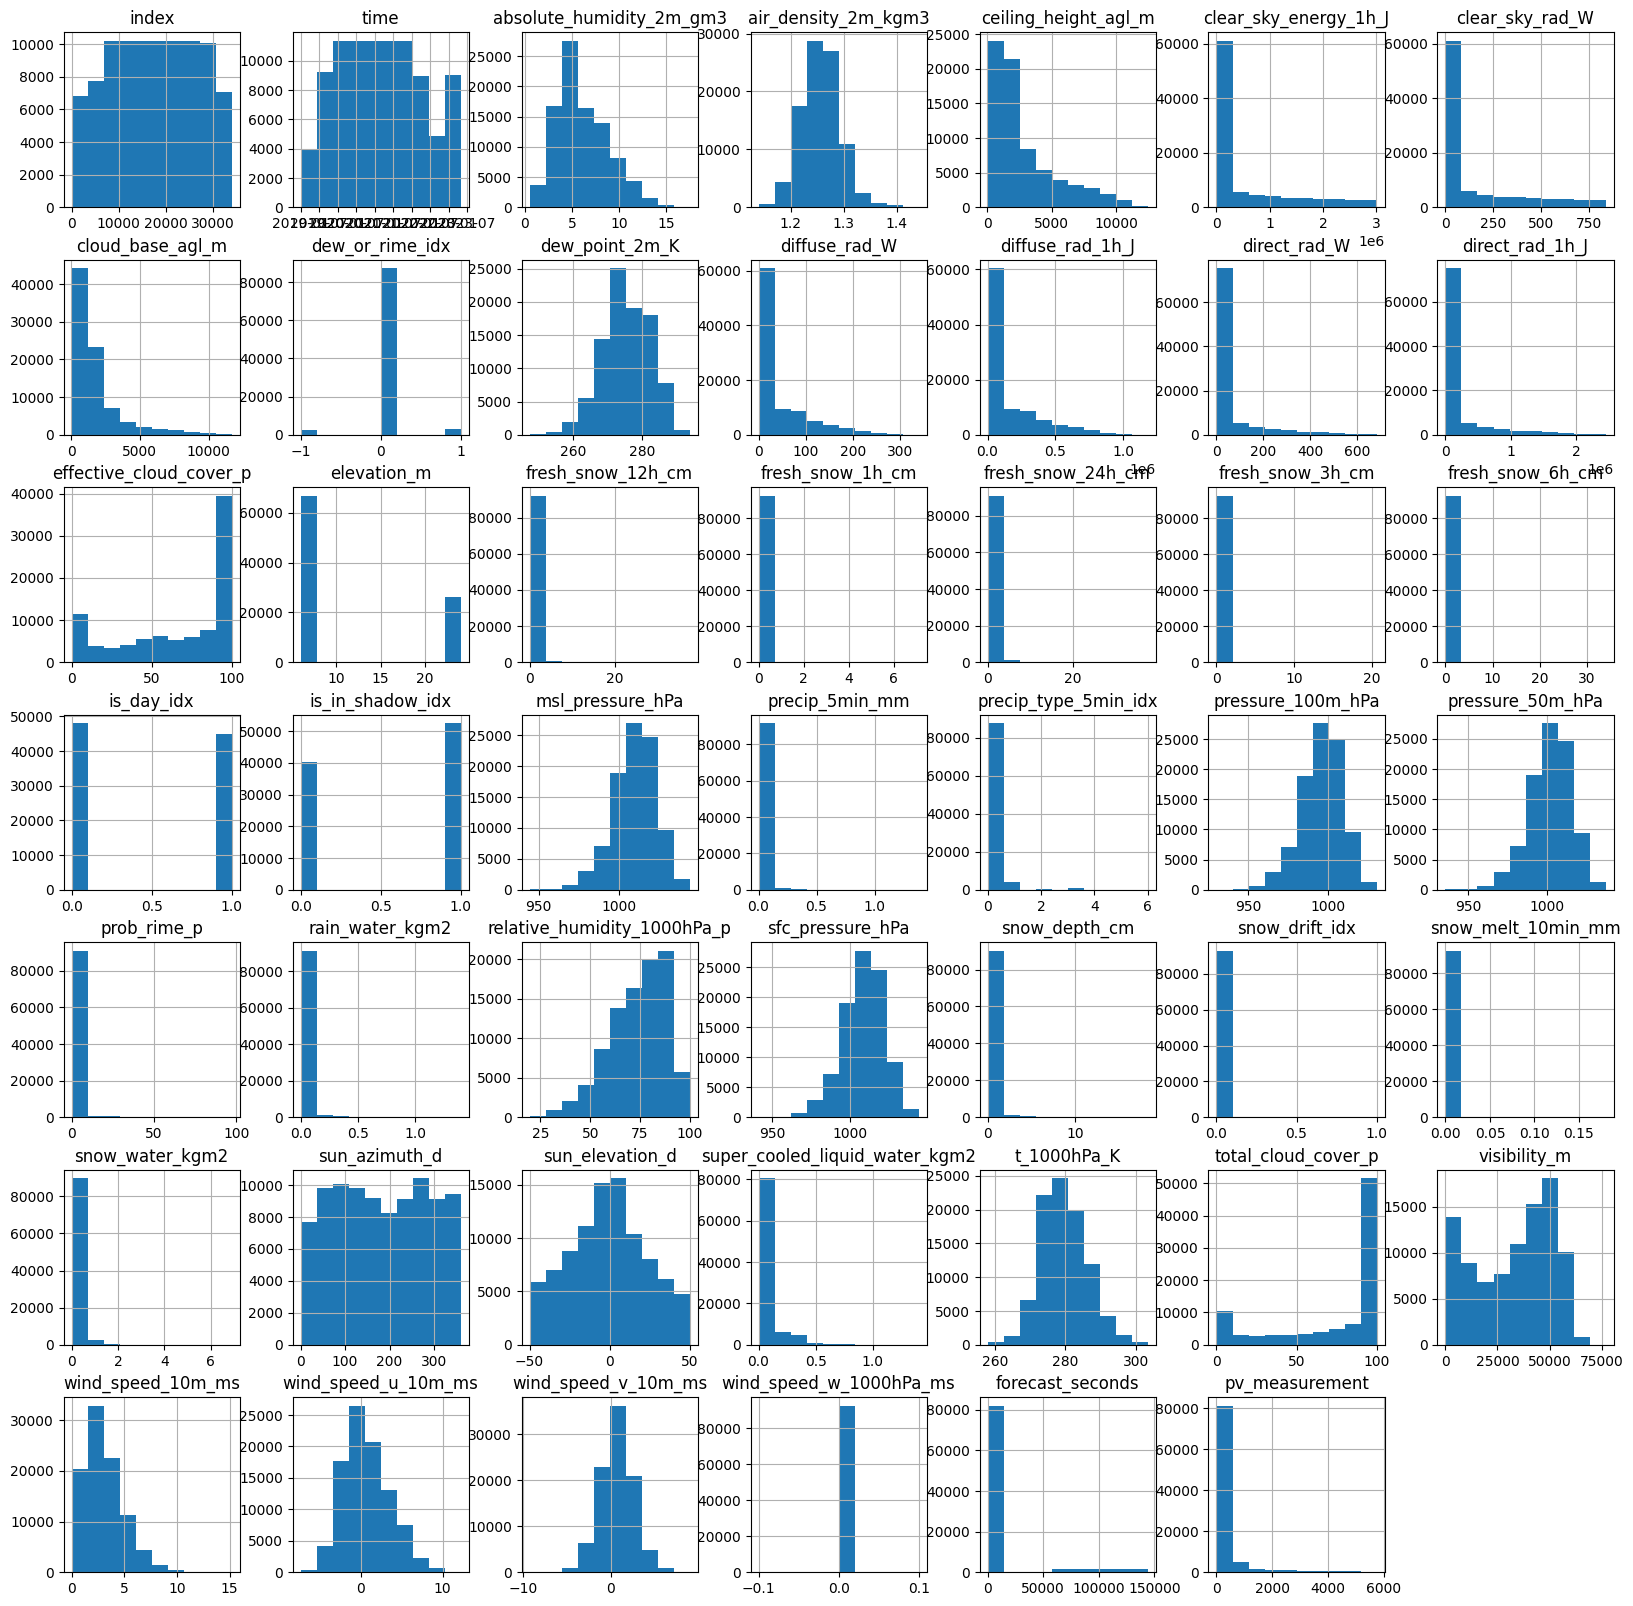

In [11]:
train_data.hist(figsize=(20,20));

1. index
2. time
3. absolute_humidity_2m_gm3
4. air_density_2m_kgm3
5. ceiling_height_agl_m
6. clear_sky_energy_1h_J
7. clear_sky_rad_W
8. cloud_base_agl_m
9. dew_or_rime_idx
10. dew_point_2m_K
11. diffuse_rad_W
12. diffuse_rad_1h_J
13. direct_rad_W
14. direct_rad_1h_J
15. effective_cloud_cover_p
16. elevation_m
17. fresh_snow_12h_cm
18. fresh_snow_1h_cm
19. fresh_snow_24h_cm
20. fresh_snow_3h_cm
21. fresh_snow_6h_cm
22. is_day_idx
23. is_in_shadow_idx
24. msl_pressure_hPa
25. precip_5min_mm
26. precip_type_5min_idx
27. pressure_100m_hPa
28. pressure_50m_hPa
29. prob_rime_p
30. rain_water_kgm2
31. relative_humidity_1000hPa_p
32. sfc_pressure_hPa
33. snow_depth_cm
34. snow_drift_idx
35. snow_melt_10min_mm
36. snow_water_kgm2
37. sun_azimuth_d
38. sun_elevation_d
39. super_cooled_liquid_water_kgm2
40. t_1000hPa_K
41. total_cloud_cover_p
42. visibility_m
43. wind_speed_10m_ms
44. wind_speed_u_10m_ms
45. wind_speed_v_10m_ms
46. wind_speed_w_1000hPa_ms
47. forecast_seconds
48. location
49. 

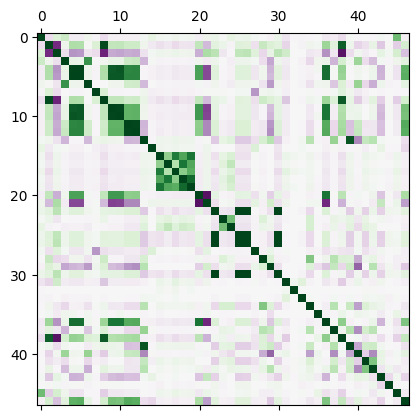

In [12]:
for i, column in enumerate(train_data.columns, 1):
    print(f"{i}. {column}")

plt.matshow(train_data.corr(), cmap="PRGn", interpolation="none", vmin=-1, vmax=1)
plt.show()

# Pycaret regression

Import pycaret

In [13]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()
session_id = 1234

Compare models

In [14]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    create_date_columns = ['hour', 'day', 'month', 'year'],
    #fix_imbalance = True,
    #transformation = True,
    #normalize = True,
    #remove_multicollinearity = True,
    #feature_selection = True, 
    #n_features_to_select = 0.5,
    #polynomial_features = True,
    #pca = True,
)
exp.compare_models()

,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 54)"
5,Transformed train set shape,"(65065, 54)"
6,Transformed test set shape,"(27886, 54)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,91.2206,62811.5653,250.3943,0.8929,1.7801,3.2914,7.7860
lightgbm,Light Gradient Boosting Machine,91.8175,66021.7315,256.7185,0.8874,1.4944,3.0111,0.5120
et,Extra Trees Regressor,85.2336,66423.6652,257.4961,0.8867,0.8534,1.7893,9.2170
xgboost,Extreme Gradient Boosting,93.9680,67591.4543,259.7844,0.8848,1.6705,4.2590,0.5740
rf,Random Forest Regressor,87.2933,69172.6993,262.6762,0.8821,0.8873,1.2976,30.5220
gbr,Gradient Boosting Regressor,110.6409,82627.5466,287.1732,0.8591,2.0238,3.9629,8.7710
ada,AdaBoost Regressor,178.6950,129831.1510,360.0108,0.7786,2.8509,12.5429,3.5410
dt,Decision Tree Regressor,116.3405,138466.2326,371.7549,0.7639,0.9118,1.2747,0.5910
lr,Linear Regression,315.0201,243690.6682,493.5432,0.5842,3.8771,39.9742,0.7620
br,Bayesian Ridge,314.9518,243768.4957,493.6202,0.5840,3.8767,38.7266,0.3480


Compare models with normalized data

In [15]:
exp.setup(
    train_data, 
    target = 'pv_measurement',
    session_id = session_id,
    create_date_columns = ['hour', 'day', 'month', 'year'],
    normalize = True,
)
exp.compare_models()

,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 54)"
5,Transformed train set shape,"(65065, 54)"
6,Transformed test set shape,"(27886, 54)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,91.2204,62812.0842,250.3952,0.8929,1.7801,3.2914,7.9140
et,Extra Trees Regressor,85.2016,66373.0323,257.4048,0.8868,0.8536,1.7897,9.3710
lightgbm,Light Gradient Boosting Machine,92.1326,66690.7472,258.0033,0.8863,1.4955,3.1070,0.5150
xgboost,Extreme Gradient Boosting,93.9680,67591.4543,259.7844,0.8848,1.6705,4.2590,0.6160
rf,Random Forest Regressor,87.3011,69204.9852,262.7341,0.8821,0.8872,1.2967,30.6070
knn,K Neighbors Regressor,101.7557,82676.9352,287.3335,0.8591,1.1047,2.4670,0.6890
gbr,Gradient Boosting Regressor,110.6471,82644.8099,287.2037,0.8591,2.0238,3.9629,9.0420
ada,AdaBoost Regressor,175.6546,128718.2256,358.5390,0.7802,2.8222,12.2672,3.3430
dt,Decision Tree Regressor,116.3060,138471.8020,371.7675,0.7639,0.9116,1.2605,0.6100
lr,Linear Regression,315.0300,243700.4436,493.5530,0.5842,3.8770,39.9798,0.3130


Compare models with gaussian transformed data

In [16]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    create_date_columns = ['hour', 'day', 'month', 'year'],
    transformation = True,
)
exp.compare_models()

,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 54)"
5,Transformed train set shape,"(65065, 54)"
6,Transformed test set shape,"(27886, 54)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,91.1110,62656.9193,250.0448,0.8932,1.7820,2.7316,8.0110
lightgbm,Light Gradient Boosting Machine,91.8049,66034.7561,256.7468,0.8874,1.4948,3.0617,1.0780
et,Extra Trees Regressor,85.4402,66095.4687,256.8378,0.8873,0.8667,1.5693,9.6130
xgboost,Extreme Gradient Boosting,93.8063,67972.4918,260.3991,0.8841,1.6620,4.0573,1.1790
rf,Random Forest Regressor,87.2240,69170.1022,262.6840,0.8821,0.8852,1.3121,31.3080
gbr,Gradient Boosting Regressor,110.2885,82592.5629,287.1153,0.8592,2.0003,3.5534,9.3630
ada,AdaBoost Regressor,177.6723,129172.6856,359.3173,0.7794,2.8853,9.9048,4.1300
dt,Decision Tree Regressor,116.1882,138994.8038,372.3702,0.7629,0.9164,1.3217,1.1790
ridge,Ridge Regression,360.5201,307206.1066,554.1562,0.4761,4.0484,39.8142,0.8040
lasso,Lasso Regression,361.0884,315753.1473,561.8071,0.4615,4.0375,28.3181,1.8010


Compare models with SMOTE sampling

Compare models with highly correlated features removed

In [ ]:
exp.setup(
    train_data, 
    target = 'pv_measurement',
    session_id = session_id,
    create_date_columns = ['hour', 'day', 'month', 'year'],
    remove_multicollinearity = True,
)
exp.compare_models()

Compare models with only the 50% best features

In [18]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    feature_selection = True, 
    n_features_to_select = 0.5,
)
exp.compare_models()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7403
[LightGBM] [Info] Number of data points in the train set: 65065, number of used features: 51
[LightGBM] [Info] Start training from score 286.781328


,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 25)"
5,Transformed train set shape,"(65065, 25)"
6,Transformed test set shape,"(27886, 25)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,92.0926,64461.5967,253.5830,0.8901,1.7640,3.0413,6.7890
lightgbm,Light Gradient Boosting Machine,93.0774,67603.5427,259.6996,0.8848,1.5238,3.0869,0.7200
xgboost,Extreme Gradient Boosting,94.4204,68763.9406,261.9174,0.8827,1.6603,2.9947,0.8810
et,Extra Trees Regressor,88.2008,69321.9859,262.9510,0.8818,0.9617,2.0956,6.3470
rf,Random Forest Regressor,88.3327,70203.1644,264.5973,0.8804,0.9552,1.5589,103.8740
gbr,Gradient Boosting Regressor,110.4335,83096.1380,287.9890,0.8583,1.9818,3.8986,7.3970
ada,AdaBoost Regressor,170.8040,127918.2508,357.3672,0.7816,2.7424,11.5787,2.3270
dt,Decision Tree Regressor,117.6542,142282.9002,377.0163,0.7572,0.9880,1.5923,0.7480
lr,Linear Regression,310.5295,308550.2513,555.3640,0.4734,3.6318,21.6914,1.0170
ridge,Ridge Regression,307.1840,309427.9942,556.1466,0.4720,3.6104,25.5886,0.4760


Compare models with only the 25% best features

In [19]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    feature_selection = True, 
    n_features_to_select = 0.25,
)
exp.compare_models()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7403
[LightGBM] [Info] Number of data points in the train set: 65065, number of used features: 51
[LightGBM] [Info] Start training from score 286.781328


,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 13)"
5,Transformed train set shape,"(65065, 13)"
6,Transformed test set shape,"(27886, 13)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,92.9502,65724.3371,256.0629,0.8879,1.7465,2.5825,4.2750
xgboost,Extreme Gradient Boosting,94.1373,68391.2766,261.1140,0.8833,1.6384,2.0831,0.7230
lightgbm,Light Gradient Boosting Machine,94.1620,69245.6131,262.8327,0.8819,1.5324,3.3867,0.6500
et,Extra Trees Regressor,89.3623,71304.6707,266.6897,0.8784,0.9698,1.6243,3.5790
rf,Random Forest Regressor,89.3839,72210.9812,268.3882,0.8769,0.9626,2.0865,13.8240
gbr,Gradient Boosting Regressor,111.7734,84230.5920,289.9251,0.8563,2.0326,3.8658,4.1920
ada,AdaBoost Regressor,163.5905,126100.4993,355.0327,0.7845,2.5915,8.1014,1.5000
dt,Decision Tree Regressor,119.1941,146884.3192,382.7815,0.7496,0.9861,1.4535,0.8040
knn,K Neighbors Regressor,177.7916,223662.4242,458.9194,0.6188,1.9134,5.3187,0.6860
lr,Linear Regression,304.9050,318707.5859,564.4135,0.4563,3.5901,31.2372,0.5520


In [20]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    feature_selection = True, 
    n_features_to_select = 0.5,
    pca = True,
)
exp.compare_models()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13260
[LightGBM] [Info] Number of data points in the train set: 65065, number of used features: 52
[LightGBM] [Info] Start training from score 286.781328


,Description,Value
0,Session id,1234
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 49)"
4,Transformed data shape,"(92951, 25)"
5,Transformed train set shape,"(65065, 25)"
6,Transformed test set shape,"(27886, 25)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,97.2733,67414.7506,259.4012,0.8850,1.9184,3.6534,11.6320
et,Extra Trees Regressor,91.8897,70751.6688,265.6638,0.8794,1.0955,2.8894,11.2570
lightgbm,Light Gradient Boosting Machine,98.0153,73147.7724,270.1312,0.8753,1.6031,3.6046,1.6100
xgboost,Extreme Gradient Boosting,101.3677,73698.6621,271.2399,0.8743,1.8626,2.7757,2.1230
rf,Random Forest Regressor,94.5070,75702.6839,274.7990,0.8710,1.1141,2.4880,61.5280
gbr,Gradient Boosting Regressor,116.9917,90514.9299,300.5967,0.8457,2.1559,6.1490,34.5310
dt,Decision Tree Regressor,126.5019,154894.9201,393.2143,0.7360,1.1276,1.8200,1.4910
ada,AdaBoost Regressor,296.0037,187038.0322,431.6061,0.6807,3.8438,35.9668,6.7100
lar,Least Angle Regression,324.7864,265203.8729,514.8440,0.5476,3.9302,25.6857,0.8500
lr,Linear Regression,324.7864,265203.8729,514.8440,0.5476,3.9302,25.6857,0.8840


In [ ]:
exp.setup(
    train_data, 
    target = 'pv_measurement', 
    session_id = session_id,
    feature_selection = True, 
    n_features_to_select = 0.5,
    polynomial_features = True,
)
exp.compare_models()

# Pytorch nerual network